In [19]:
!pip install scikit-optimize

In [20]:
# ======================================
# 1. Import Libraries
# ======================================

In [21]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from itertools import product
from skopt import gp_minimize
from skopt.space import Real

In [22]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [23]:
inputs4 = np.array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226, 0.75179548, 0.72382744],
       [0.98562189, 0.66693268, 0.15678328, 0.8565348 ],
       [0.03782483, 0.66485335, 0.16198218, 0.25392378],
       [0.68348638, 0.9027701 , 0.33541983, 0.99948256],
       [0.17034731, 0.75695908, 0.27652049, 0.5312315 ],
       [0.85965692, 0.91959232, 0.20613873, 0.09779683],
       [0.28213837, 0.50598691, 0.53053084, 0.09630162],
       [0.32607578, 0.4723669 , 0.453192  , 0.10588734],
       [0.94838936, 0.89451301, 0.85163782, 0.55219629],
       [0.66495539, 0.04656628, 0.11677747, 0.79371778],
       [0.57776561, 0.42877174, 0.42582587, 0.24900741],
       [0.73861301, 0.48210263, 0.70936644, 0.50397001],
       [0.8548108 , 0.49396462, 0.73530997, 0.80809201],
       [0.000025, 0.000025, 0.000025, 0.000025],
       [0.001200, 0.001200, 0.001200, 0.001200],
       [0.110000, 0.110000, 0.110000, 0.110000],
       [0.000100, 0.000100, 0.000100, 0.000100],
       [0.080000, 0.080000, 0.080000, 0.080000],
       [0.060000, 0.060000, 0.060000, 0.060000],
       [0.006000, 0.006000, 0.006000, 0.006000],
       [0.000050, 0.000050, 0.000050, 0.000050],
       [0.004000, 0.004000, 0.004000, 0.004000],
       [0.003000, 0.003000, 0.003000, 0.003000],
       [0.001000, 0.001000, 0.001000, 0.001000],
       [0.100000, 0.100000, 0.100000, 0.100000]])

X = inputs4

In [24]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [25]:
outputs4 = np.array([-22.10828779, -14.60139663, -11.69993246, -16.05376511,
       -10.06963343, -15.48708254, -12.68168498, -16.02639977,
       -17.04923465, -12.74176599, -27.31639636, -13.52764887,
       -16.6791152 , -16.50715856, -17.81799934, -26.56182083,
       -12.75832422, -19.44155762, -28.90327367, -13.70274694,
       -29.4270914 , -11.56574199, -26.85778644,  -7.96677535,
        -6.70208925, -32.62566022, -19.98949793,  -4.02554228,
       -13.12278233, -23.1394284, -25.27770013447238, -25.21514559073533, -16.71402790788444, -25.27351657765553, 
       -17.297844082614386, -19.185048646097858, -25.0297450291193,-25.276302770796466,-25.09294926795145,
       -25.132127873299925, -25.225337084258488, -16.577942119744957])

y = outputs4

In [26]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

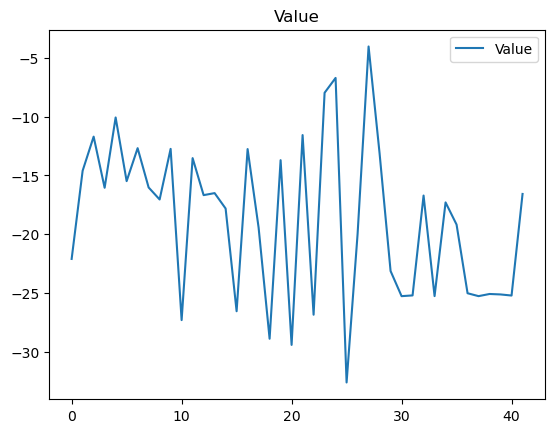

In [29]:
df = pd.DataFrame(outputs4, columns = ['Value'], index = range(outputs4.size))
plot = df.plot(title="Value")

C:\Users\Soumitro Mukherjee\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


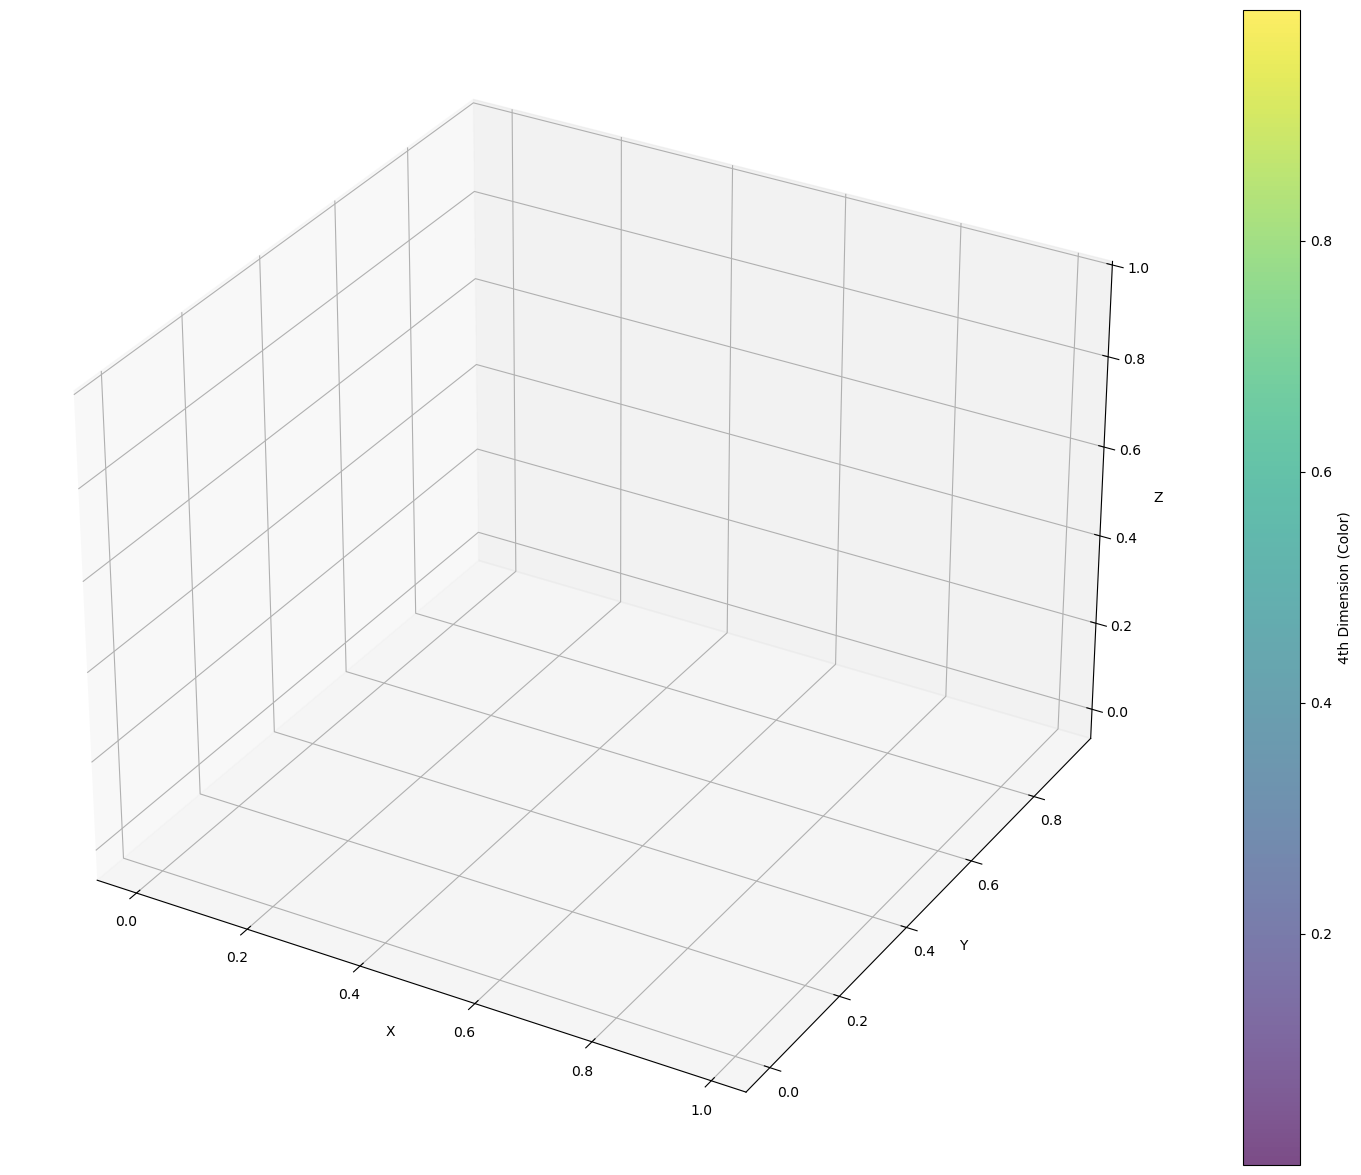

In [30]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 3], s = y*100, cmap='viridis', alpha=0.7)

fig.colorbar(sc, label='4th Dimension (Color)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [31]:
#Define kernel used
kernel_best_Q4 = ConstantKernel(2.0, (1e-3, 1e3)) * Matern(length_scale=[0.5, 0.5, 0.5, 0.5], nu=2.5)

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(
    kernel=kernel_best_Q4,
    n_restarts_optimizer=10,
    alpha=1e-6,
    normalize_y=True)

# Fit to data
gp.fit(X, y)

#Print the kernel to check if the value of optimized kernel is normal 
print("Optimized kernel:", gp.kernel_)

Optimized kernel: 1.03**2 * Matern(length_scale=[0.406, 0.101, 0.537, 0.577], nu=2.5)


In [32]:
def hybrid_ucb(X, gp, kappa=4.0, alpha=0.5):
    mu, sigma = gp.predict(X, return_std=True)
    return alpha * mu + (1 - alpha) * (mu + kappa * sigma)


def optimize_acquisition_global(acquisition_func, gp, bounds, n_random=5000, n_local=10, **kwargs):
    dim = len(bounds)

    X_random = np.random.uniform(
        [b[0] for b in bounds],
        [b[1] for b in bounds],
        size=(n_random, dim)
    )
    y_random = acquisition_func(X_random, gp, **kwargs)

    top_idx = np.argsort(y_random)[-n_local:]
    best_val = -np.inf
    best_x = None

    for idx in top_idx:
        x0 = X_random[idx]

        def objective(x):
            return -acquisition_func(x.reshape(1, -1), gp, **kwargs)

        res = minimize(objective, x0=x0, bounds=bounds, method="L-BFGS-B")
        if not res.success:
            continue

        val = -res.fun
        if val > best_val:
            best_val = val
            best_x = res.x

    return best_x

In [33]:
bounds = [(0, 1), (0, 1), (0, 1), (0 ,1)]

next_point = optimize_acquisition_global(hybrid_ucb, gp, bounds, n_random=10000, n_local=200, kappa=0.5, alpha=0.5)

print("Next query point (by UCB):", next_point)

Next query point (by UCB): [0.53292523 0.45120267 0.37038517 0.32969711]
